In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.model_selection import StratifiedShuffleSplit

### Loading Dataset

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Splitting Data into train and test

In [3]:
data = iris.data
target = iris.target

In [4]:
strat_sample = StratifiedShuffleSplit(n_splits=1, test_size=.2,random_state=93)

In [5]:
for train_index, test_index in strat_sample.split(data,target):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

In [6]:
print(f'The features are : {X_train[:10]} \n and corresponding output is {y_train[:10]}')
print(f"The size of training set is {X_train.shape[0]}")
print(f"The size of test set is {X_test.shape[0]}")

The features are : [[6.4 2.8 5.6 2.1]
 [5.2 2.7 3.9 1.4]
 [6.  3.4 4.5 1.6]
 [5.8 2.8 5.1 2.4]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [6.2 2.2 4.5 1.5]
 [5.  3.2 1.2 0.2]
 [5.7 3.8 1.7 0.3]
 [7.7 3.8 6.7 2.2]] 
 and corresponding output is [2 1 1 2 2 1 1 0 0 2]
The size of training set is 120
The size of test set is 30


### Creating model

In [7]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
predictions = tree_clf.predict(X_test)

### Confusion Matrix

In [9]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]])

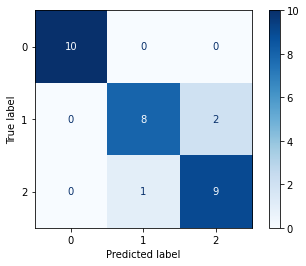

In [10]:
plot_confusion_matrix(tree_clf,X_test,y_test,cmap="Blues")

In [11]:
accuracy = accuracy_score(y_test,predictions)
# precision = precision_score(y_test,predictions,average='weighted')
# recall = precision_score(y_test,predictions,average = 'weighted')

print(f'The accuracy is {accuracy}')
# print(f'The precision is {precision}')
# print(f'The recall is {recall}')

The accuracy is 0.9


### Exporting png of tree

In [37]:
export_graphviz(tree_clf,out_file="iris.dot",feature_names=iris.feature_names,class_names = iris.target_names,rounded = True,filled = True)